In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline

In [2]:
tend =10
dt = 0.01
dx = 0.1 
L = 10
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi =  0.5 

In [3]:
ftc = PorousMediaLab(L, dx, tend, dt, phi)

In [4]:
C_init=0.0000001/phi/3
ftc.add_species(is_solute=True, element='H2CO3', D=50, init_C=C_init, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='HCO3', D=50, init_C=C_init, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='CO3', D=50, init_C=C_init, bc_top=1e-3, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')

ftc.add_acid(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])


ftc.add_species(is_solute=True, element='H2SO4', D=50, init_C=C_init,  bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='HSO4',  D=50, init_C=C_init,  bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='SO4',  D=50, init_C=C_init,  bc_top=1e-3, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')

ftc.add_acid(species=['H2SO4', 'HSO4', 'SO4'], pKa=[-10, 1.99])

ftc.add_species(is_solute=True, element='Ca', D=50, init_C=1e-9, bc_top=0., bc_top_type='flux', bc_bot=1e-2, bc_bot_type='flux')
ftc.add_species(is_solute=False, element='CaCO3', D=5, init_C=0., bc_top=0.0, bc_top_type='flux', bc_bot=0.00, bc_bot_type='flux')
ftc.add_species(is_solute=False, element='CaSO4', D=5, init_C=0., bc_top=0.0, bc_top_type='flux', bc_bot=0.00, bc_bot_type='flux')


ftc.add_ion(element='Ca', charge=2)

In [5]:
ftc.constants['Ks_CaCO3'] = 3.3e-9
ftc.constants['Ks_CaSO4'] = 10**-4.58
ftc.constants['k_pre'] = 1e-2
ftc.constants['k_dis'] = 1e-1
ftc.constants['CF'] = (1-phi)/phi  ### conversion factor



In [6]:
ftc.rates['R_pre_CaCO3'] = 'k_pre * (Ca*CO3/Ks_CaCO3-1)'
ftc.rates['R_pre_CaSO4'] = 'k_pre * (Ca*SO4/Ks_CaSO4-1)'
ftc.rates['R_dis_CaCO3'] = 'k_dis * CaCO3 * (1 - Ca*CO3/Ks_CaCO3)'
ftc.rates['R_dis_CaSO4'] = 'k_dis * CaSO4 * (1 - Ca*SO4/Ks_CaSO4)'

In [7]:
ftc.dcdt['CaCO3'] = 'R_pre_CaCO3/CF - R_dis_CaCO3'
ftc.dcdt['Ca'] = '-R_pre_CaCO3 + R_dis_CaCO3*CF - R_pre_CaSO4 + R_dis_CaSO4*CF'
ftc.dcdt['CO3'] = '-R_pre_CaCO3 + R_dis_CaCO3*CF'
ftc.dcdt['CaSO4'] = 'R_pre_CaSO4/CF - R_dis_CaSO4'
ftc.dcdt['SO4'] = '-R_pre_CaSO4 + R_dis_CaSO4*CF'

In [8]:
# %%timeit
ftc.solve()

Simulation started:
	 2017-09-14 16:46:25


Estimated time of the code execution:
	 0h:05m:06s
Will finish approx.:
	 2017-09-14 16:52:02


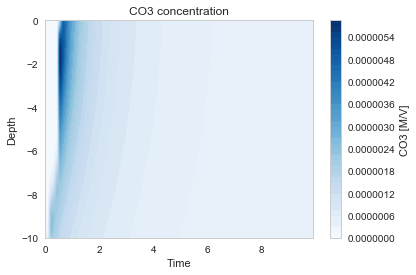

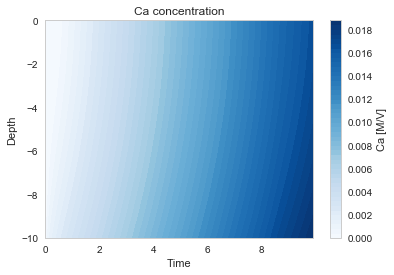

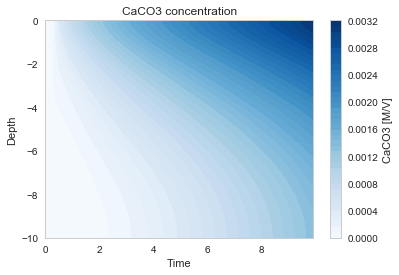

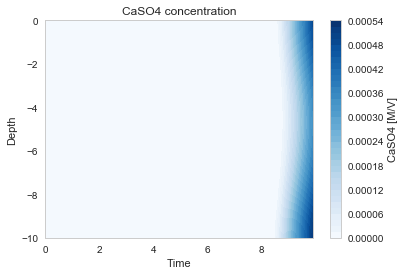

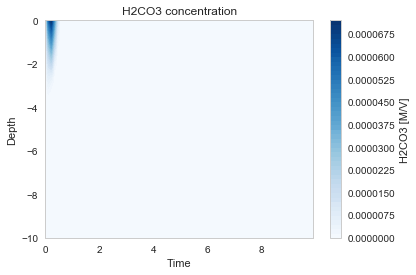

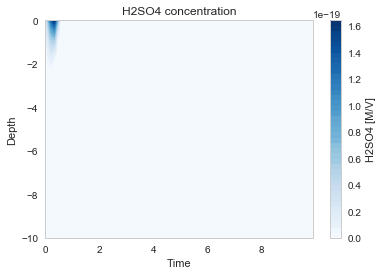

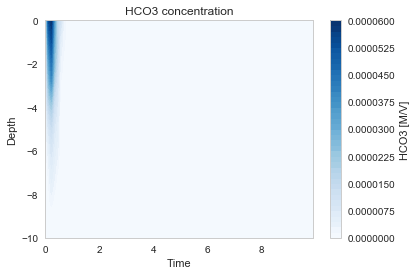

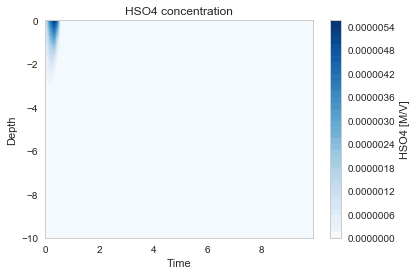

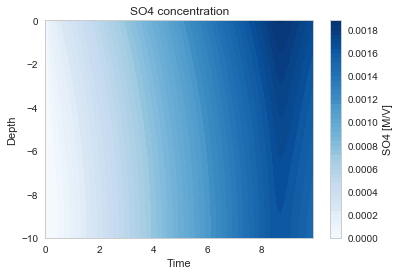

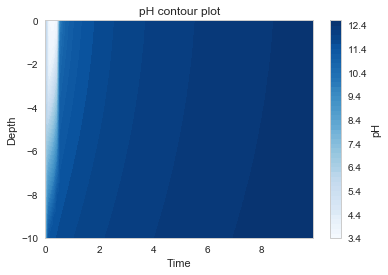

In [9]:
ftc.plot_contourplots(labels=False)

### Saturation indeces

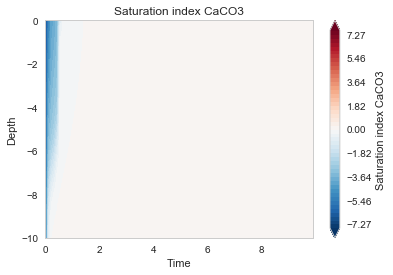

In [10]:
ftc.plot_saturation_index('Ca','CO3','Ks_CaCO3')

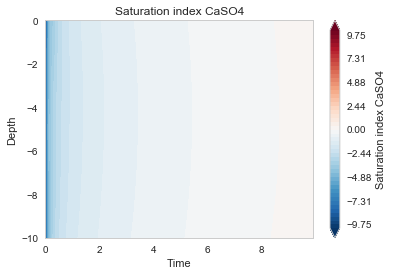

In [11]:
ftc.plot_saturation_index('Ca','SO4','Ks_CaSO4')

In [12]:
ftc.reconstruct_rates()

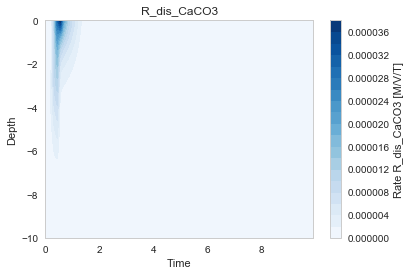

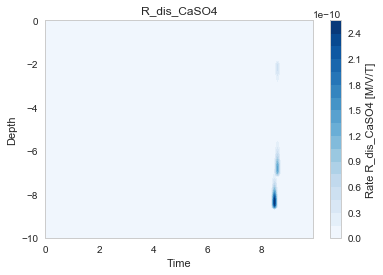

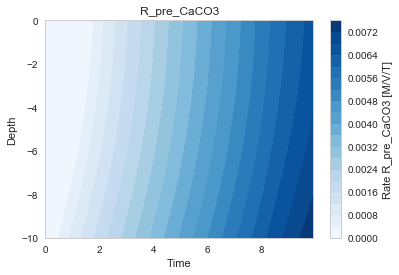

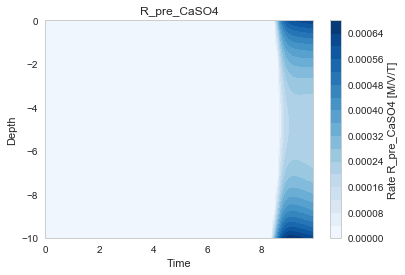

In [13]:
ftc.plot_contourplots_of_rates()

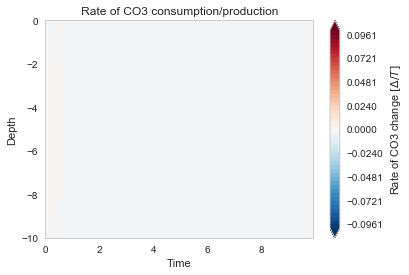

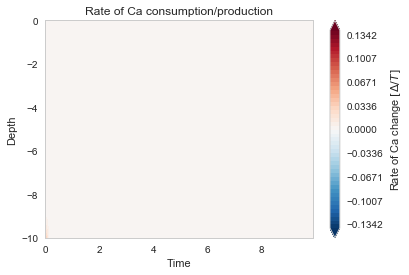

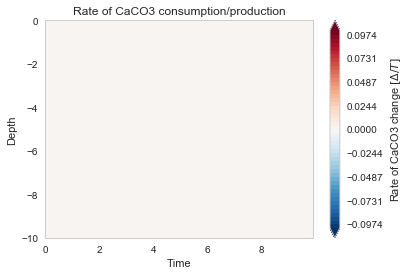

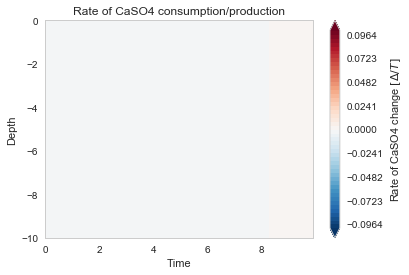

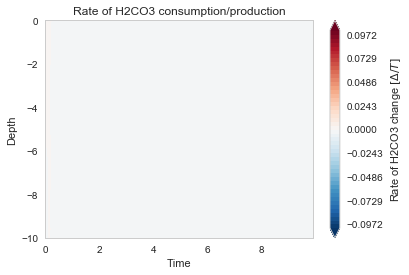

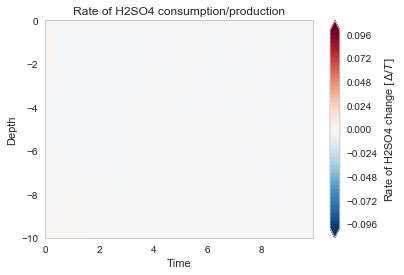

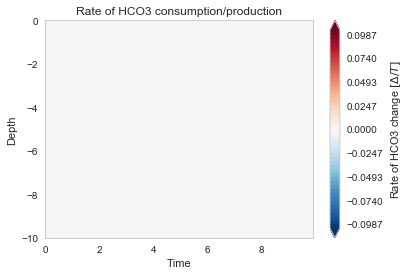

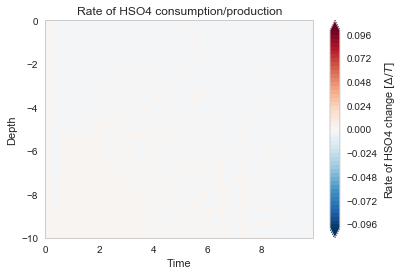

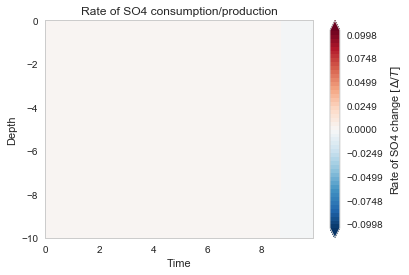

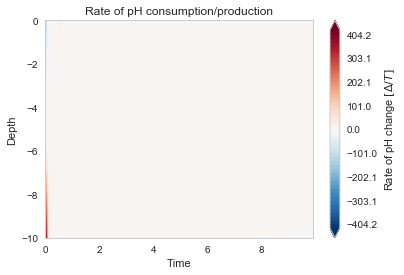

In [14]:
ftc.plot_contourplots_of_deltas()